In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.animation as animation

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("world-happiness-report.csv")
data


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [3]:
data_2021 = pd.read_csv("world-happiness-report-2021.csv")
data_2021


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


[]

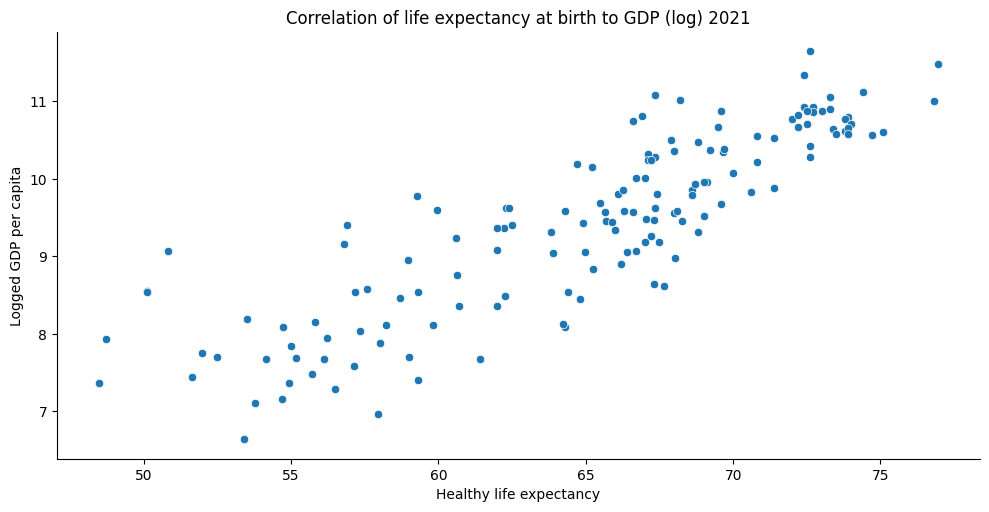

In [4]:
ax = sb.relplot(data=data_2021, x="Healthy life expectancy", y="Logged GDP per capita", aspect=2)

ax.set(title="Correlation of life expectancy at birth to GDP (log) 2021")
plt.plot()

[]

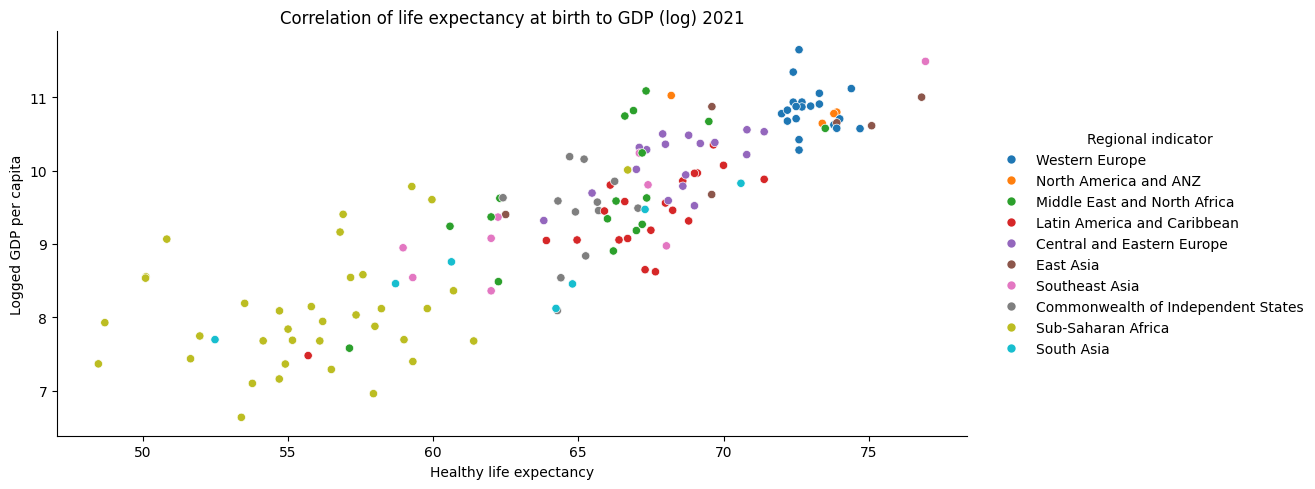

In [5]:
ax = sb.relplot(
    data=data_2021,
    x="Healthy life expectancy",
    y="Logged GDP per capita",
    aspect=2,
    hue="Regional indicator",
)

ax.set(title="Correlation of life expectancy at birth to GDP (log) 2021")
ax.tight_layout()
plt.plot()

In [6]:
population = pd.read_csv("population_by_country_2020.csv")
data_2021 = data_2021.merge(population, left_on="Country name", right_on="Country (or dependency)")
data_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,5542237,0.15 %,8564,18,303890,14000.0,1.5,43,86 %,0.07 %
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,5795780,0.35 %,20326,137,42430,15200.0,1.8,42,88 %,0.07 %
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,8665615,0.74 %,63257,219,39516,52000.0,1.5,43,74 %,0.11 %
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,341628,0.65 %,2212,3,100250,380.0,1.8,37,94 %,0.00 %
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,17141544,0.22 %,37742,508,33720,16000.0,1.7,43,92 %,0.22 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,2145194,0.80 %,16981,71,30360,-10047.0,3.2,24,31 %,0.03 %
136,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,2359585,2.08 %,47930,4,566730,3000.0,2.9,24,73 %,0.03 %
137,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,13005303,2.58 %,325268,525,24670,-9000.0,4.1,20,18 %,0.17 %
138,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,14899771,1.48 %,217456,38,386850,-116858.0,3.6,19,38 %,0.19 %


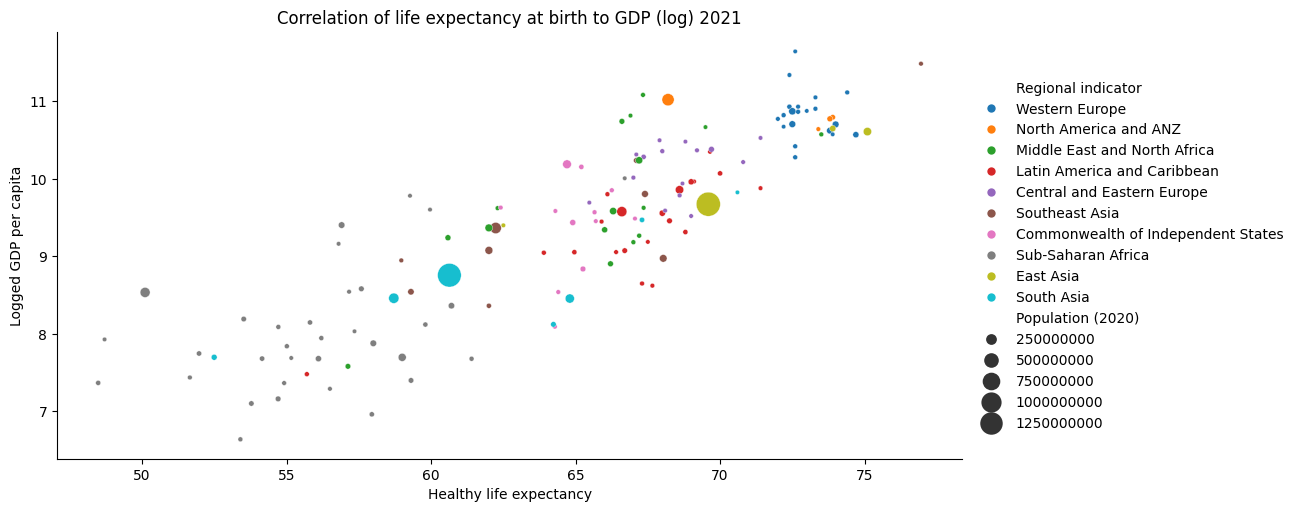

In [7]:
ax = sb.relplot(
    data=data_2021,
    x="Healthy life expectancy",
    y="Logged GDP per capita",
    aspect=2,
    hue="Regional indicator",
    size="Population (2020)",
    sizes=(10, 300),
)

# Set the plot title
ax.set(title="Correlation of life expectancy at birth to GDP (log) 2021")

plt.show()

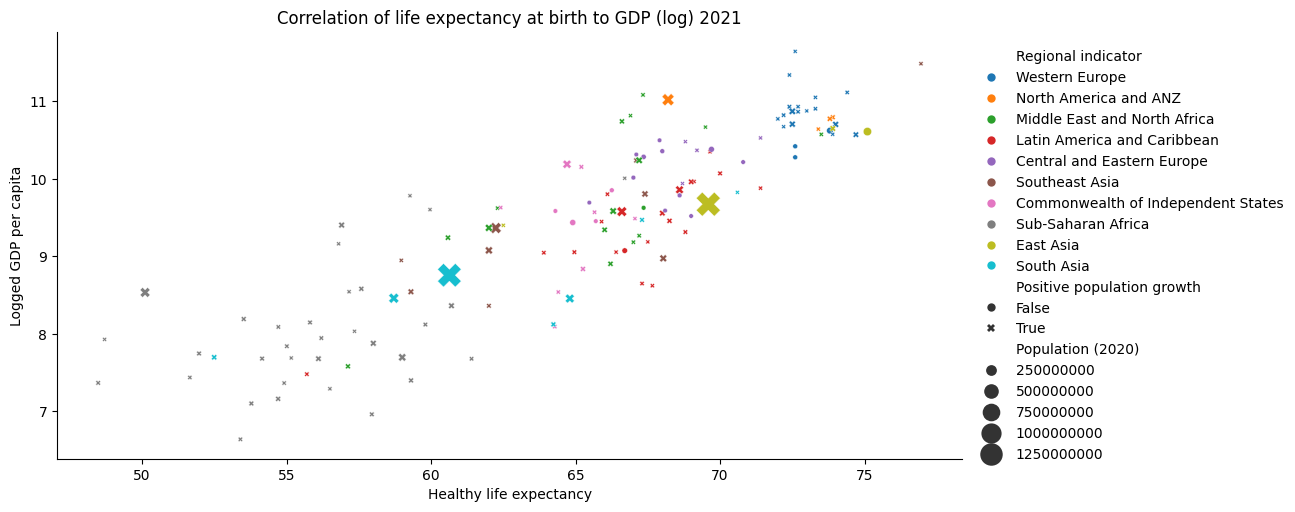

In [8]:
data_2021["Positive population growth"] = (data_2021["Yearly Change"].str[:-2].astype(float) > 0)


ax = sb.relplot(
    data=data_2021,
    x="Healthy life expectancy",
    y="Logged GDP per capita",
    aspect=2,
    hue="Regional indicator",
    size="Population (2020)",
    sizes=(10, 300),
    style="Positive population growth",
)

# Set the plot title
ax.set(title="Correlation of life expectancy at birth to GDP (log) 2021")

plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


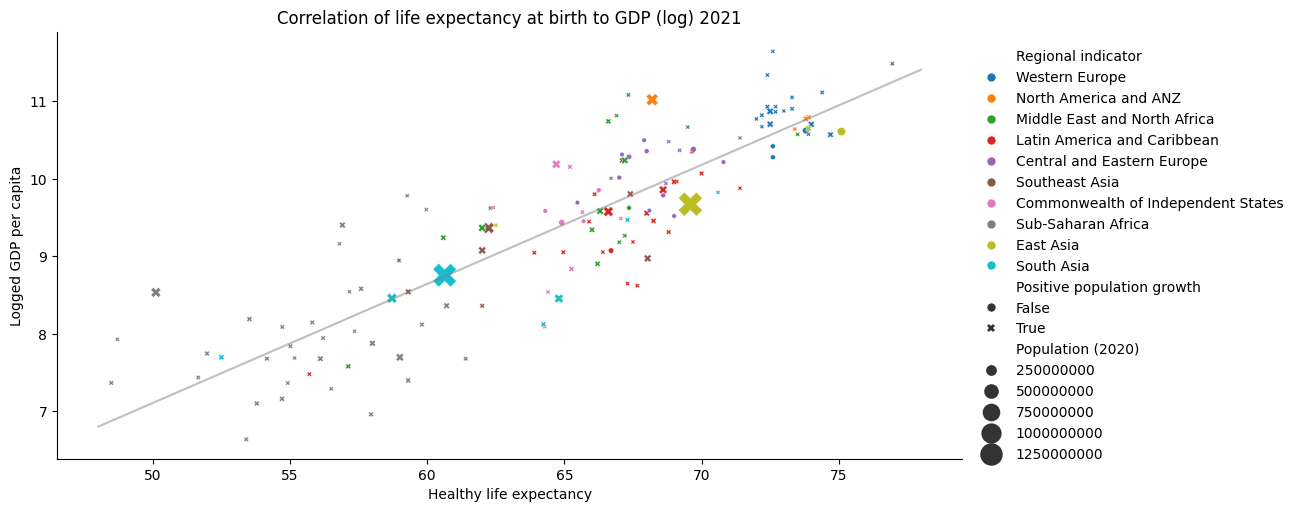

In [9]:
# add trendline
ax = sb.relplot(
    data=data_2021,
    x="Healthy life expectancy",
    y="Logged GDP per capita",
    aspect=2,
    hue="Regional indicator",
    size="Population (2020)",
    sizes=(10, 300),
    style="Positive population growth",
)

model = LinearRegression().fit(data_2021[["Healthy life expectancy"]], data_2021["Logged GDP per capita"])
x = np.linspace(48, 78, 2)
y = model.predict(x.reshape(-1, 1))
plt.plot(x, y, color="Grey", alpha=0.5)



# Set the plot title
ax.set(title="Correlation of life expectancy at birth to GDP (log) 2021")

plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


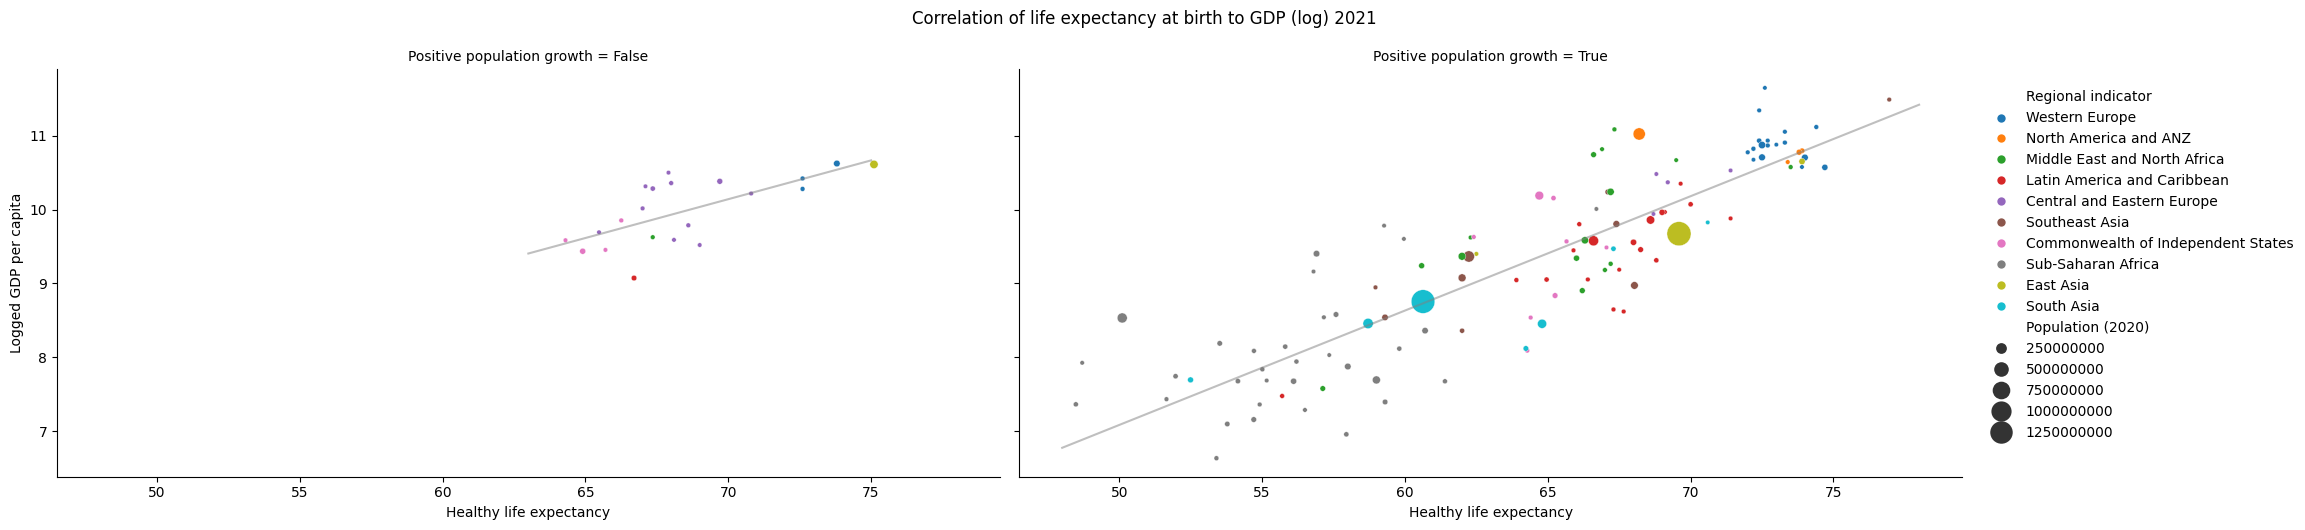

In [10]:
# facets
ax = sb.relplot(
    data=data_2021,
    x="Healthy life expectancy",
    y="Logged GDP per capita",
    aspect=2,
    hue="Regional indicator",
    size="Population (2020)",
    sizes=(10, 300),
    #style="Positive population growth",
    col="Positive population growth",
    col_wrap=2,
)

model1 = LinearRegression().fit(data_2021[data_2021["Positive population growth"]][["Healthy life expectancy"]], data_2021[data_2021["Positive population growth"]]["Logged GDP per capita"])
x1 = np.linspace(48, 78, 2)
y1 = model1.predict(x1.reshape(-1, 1))
ax.axes[1].plot(x1, y1, color="Grey", alpha=0.5)

model2 = LinearRegression().fit(data_2021[~data_2021["Positive population growth"]][["Healthy life expectancy"]], data_2021[~data_2021["Positive population growth"]]["Logged GDP per capita"])
x2 = np.linspace(63, 75, 2)
y2 = model2.predict(x2.reshape(-1, 1))
ax.axes[0].plot(x2, y2, color="Grey", alpha=0.5)


plt.suptitle("Correlation of life expectancy at birth to GDP (log) 2021", y=1.05)

plt.show()